# # Contents

#### 1 Data Cleaning 
 - 1.1 Duplicates 
 - 1.2 Missing Value
 - 1.3 Non-standard Value
 - 1.4 Outlier
 
#### 2 Dependent Variable: Income

#### 3 Independent Variables
 - 3.1 Numerical
 - 3.2 Categorical
 
#### 4 Correlations
 - 4.1 Numerical with Income
 - 4.2 Categorical with Income¶
 - 4.2.1 average income 
 - 4.2.2 count by income for every categorical columns
 - 4.2.3 Count by income in Sex==Female
 - 4.2.4 Count by income when sex==Male

# Settings & Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('bmh')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./adult_income.csv')

In [3]:
df.shape

(32561, 15)

In [4]:
df.head(2)

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# 1 Data Cleaning 

## 1.1 Duplicates 

In [5]:
df[df.duplicated(keep='last')].sample(2)

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
7053,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


In [6]:
df[df.duplicated(keep='first')].sample(2)

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
29157,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
28846,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


### methods: keep the first record and drop the duplicates row

In [7]:
print(df.shape)
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)

(32561, 15)
(32537, 15)


# 1.2 Missing Value

In [8]:
df.isna().sum()

Age                0
 Work-class        0
 fnlwgt            0
 Education         0
 Education-num     0
 Marital-status    0
 Occupation        0
 Relationship      0
 Race              0
 Sex               0
 Capital-gain      0
 Capital-loss      0
 Hours-per-week    0
 Native-country    0
 Income            0
dtype: int64

# 1.3 Non-standard Value

In [9]:
# Check values in categoricals
for i in df.select_dtypes(include = ['object']).columns:
    print(i)
    print(df[i].unique())

 Work-class
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 Marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 Occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
 Relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 Race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
 Sex
[' Male' ' Female']
 Native-country
[' United-States' ' Cuba' ' Jamaica' '

In [10]:
df[(df[' Work-class']==' ?')|(df[' Occupation']==' ?') |(df[' Native-country']==' ?')].shape[0]

2398

### methods：drop 2398 rows

In [11]:
df.drop(index=df[(df[' Work-class']==' ?')|(df[' Occupation']==' ?') |(df[' Native-country']==' ?')].index,inplace=True)

In [12]:
df.shape

(30139, 15)

## 1.4 Outlier

In [13]:
#reconstruct a new columns:named 'Captical' 
df['Capital'] = df[' Capital-gain'] + df[' Capital-loss']
df.drop(' Capital-gain', axis=1, inplace=True)
df.drop(' Capital-loss', axis=1, inplace=True)
print(df.shape)

(30139, 14)


In [14]:
# distribution of numerical data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Age,fnlwgt,Education-num,Hours-per-week,Capital
count,30139.00,30139.00,30139.00,30139.00,30139.00
mean,38.44,189795.03,10.12,40.93,1181.28
std,13.13,105658.62,2.55,11.98,7407.10
min,17.00,13769.00,1.00,1.00,0.00
25%,28.00,117627.50,9.00,40.00,0.00
50%,37.00,178417.00,10.00,40.00,0.00
75%,47.00,237604.50,13.00,45.00,0.00
max,90.00,1484705.00,16.00,99.00,99999.00


### methods: drop outliers about capital

In [15]:
# According to the boxplot, suggest to drop rows whenn 'Captical' is higher than 10000,
# this methods will minimize outliers while maintaining data integrity. 
def deleterows(df0,name,threshold):
    df=df0.copy()
    index=df[df[name]>=threshold].index
    drop=df.drop(index=index)
    return drop
drop=deleterows(df,'Capital',10000)
print(drop.shape[0])
print(df.shape[0]-drop.shape[0])
# drop 732 rows

29407
732


In [16]:
databackup=df.copy()

In [17]:
df=drop

In [18]:
df.shape

(29407, 14)

Age


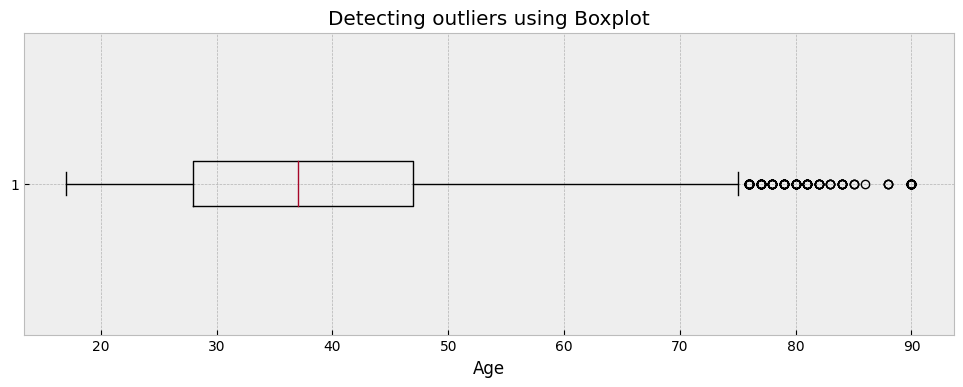

 fnlwgt


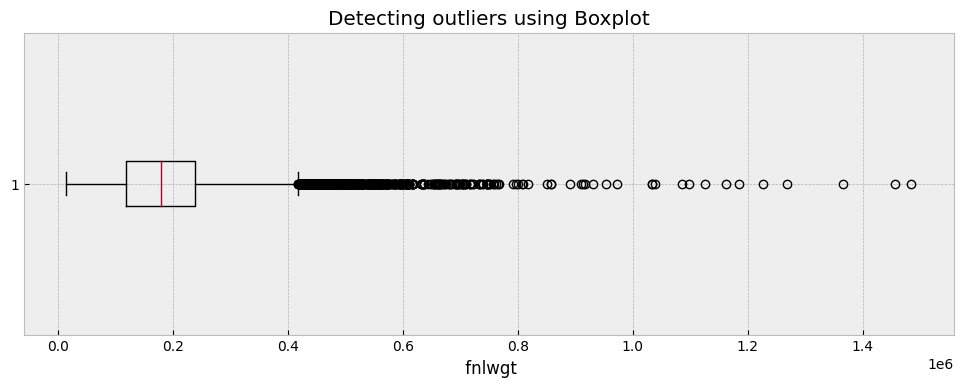

 Education-num


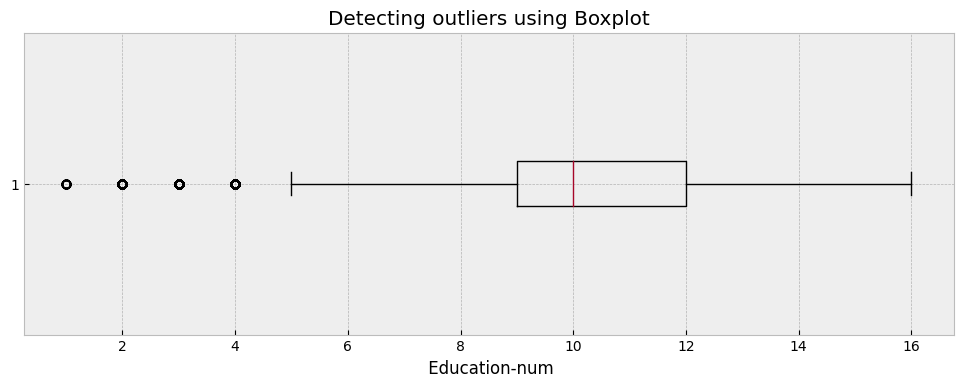

 Hours-per-week


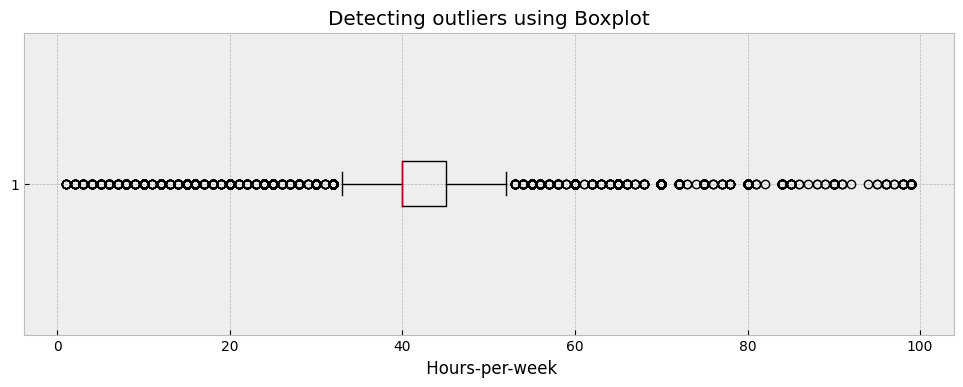

Capital


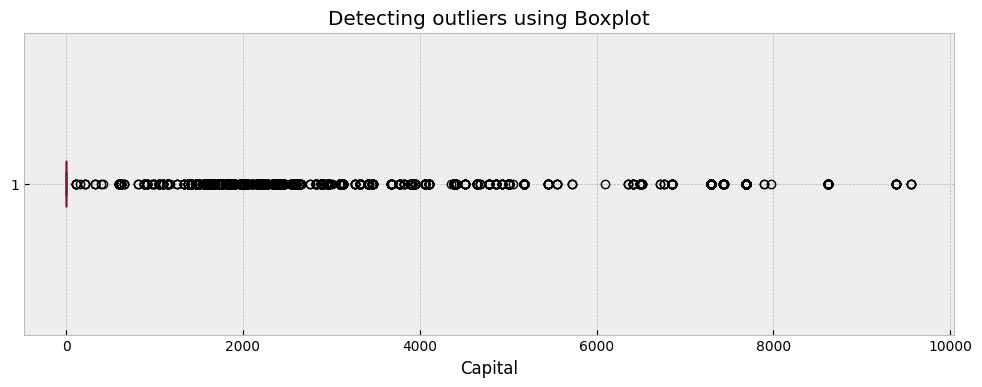

In [19]:
# check outliers for numerical data using boxplot
for i in df.select_dtypes(include=['int64']).columns:
    print(i)
    plt.figure(figsize=(12,4),dpi=100)
    plt.boxplot(drop[i], vert=False)
    plt.title("Detecting outliers using Boxplot")
    plt.xlabel(str(i))
    plt.show()

# 2 Dependent Variable: Income

In [20]:
#set dummy variables for income column
df['income']=df[' Income'].map(lambda x: 0 if x ==' <=50K' else 1)

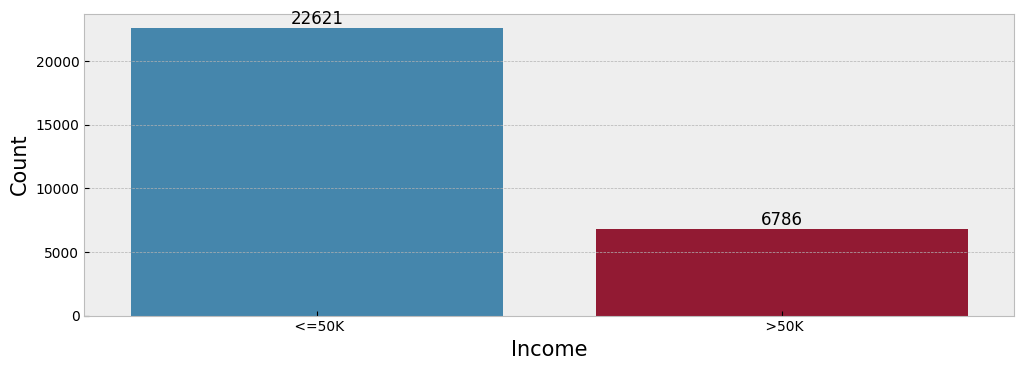

In [21]:
# dependent varibale Counting
import seaborn as sns
plt.figure(figsize=(12,4),dpi=100)
sns.countplot(df[' Income'])
for i,c in zip(range(2),df[' Income'].value_counts()):
    plt.text(i,c,c,ha='center', va='bottom',fontsize=12)
    plt.xlabel('Income', size=15)
    plt.ylabel('Count', size=15)
plt.show()

In [22]:
#highly skewed, imbalanced
df['income'].skew() 

1.2781369603148889

# 3 Independent Variables

## 3.1 Numerical

In [23]:
columns=['Age',' fnlwgt', ' Hours-per-week', 'Capital']

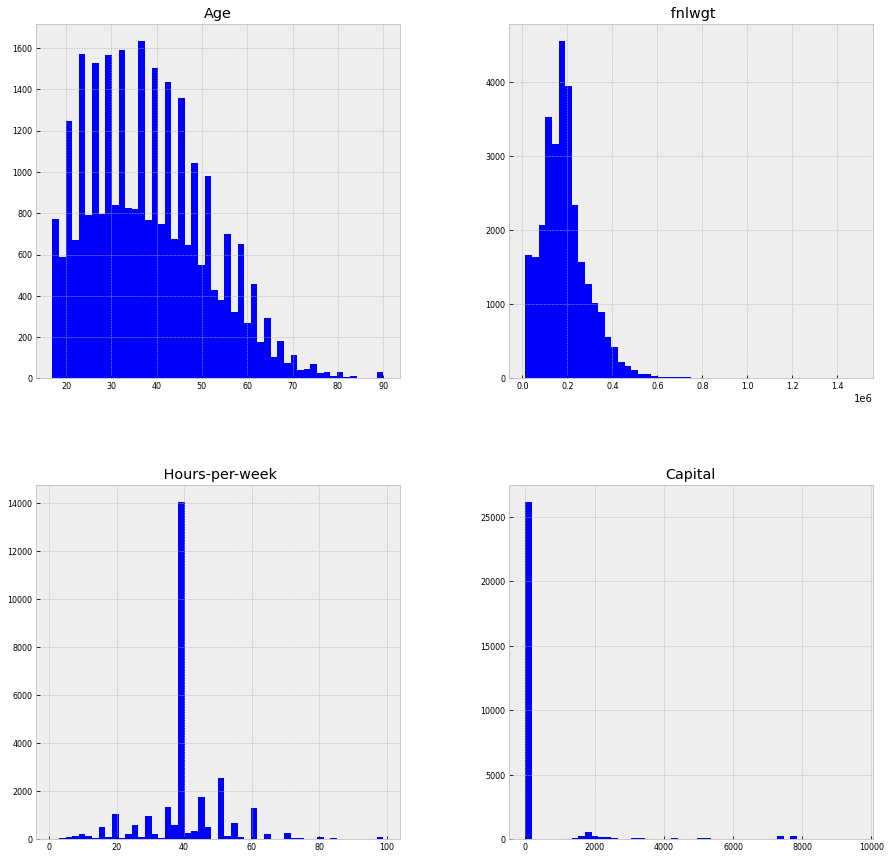

In [24]:
df[columns].hist(figsize=(15, 15),color='blue', bins=50, xlabelsize=8, ylabelsize=8); 

## 3.2 Categorical

In [25]:
#create a new column "capital_join" only for EDA
#because we find that so many rows are zero showing that people are not joining in captical investment.
df['Capital_join']=df['Capital'].map(lambda x: 'Yes' if x!=0 else 'No')

 Work-class


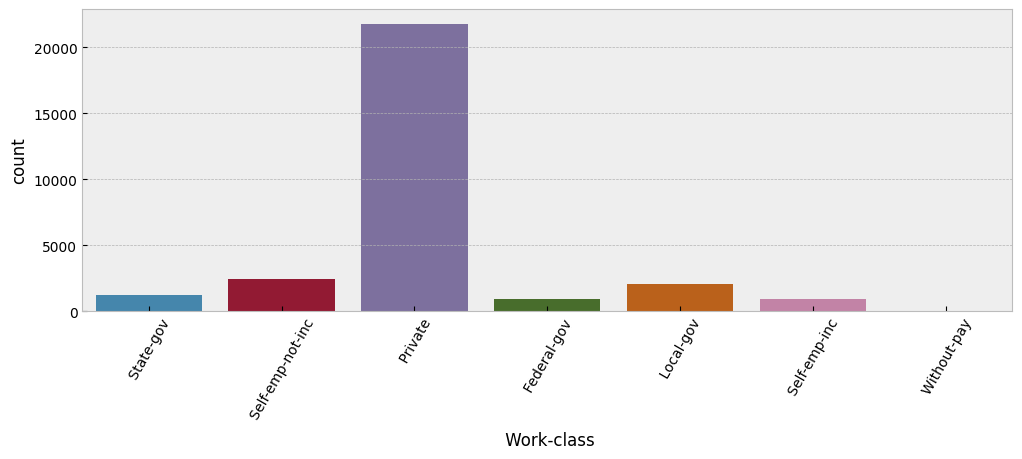

 Education


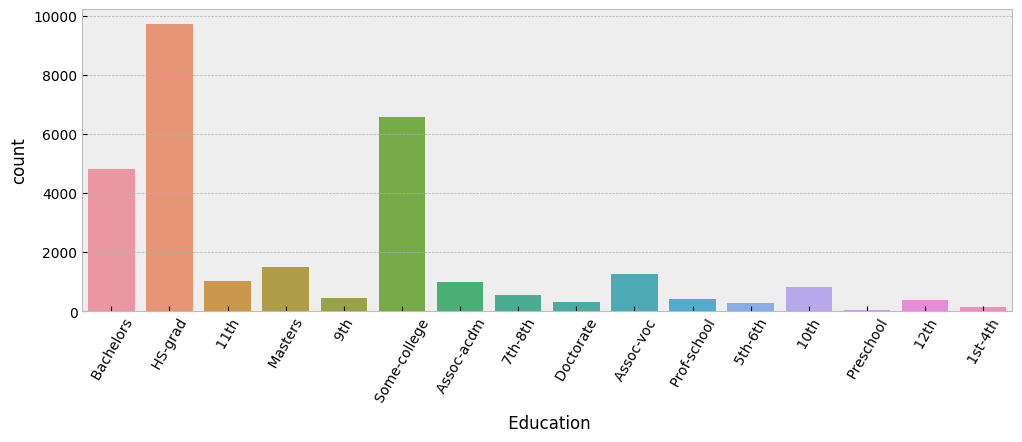

 Marital-status


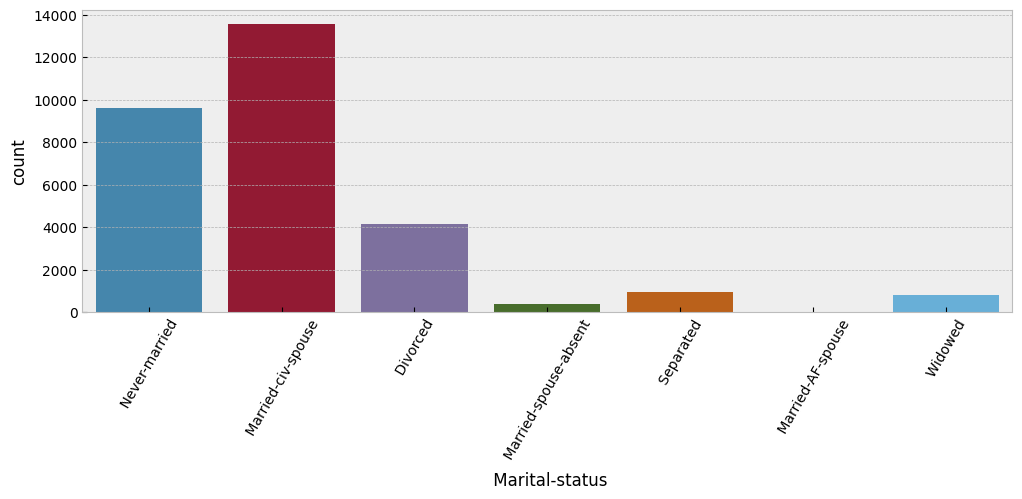

 Occupation


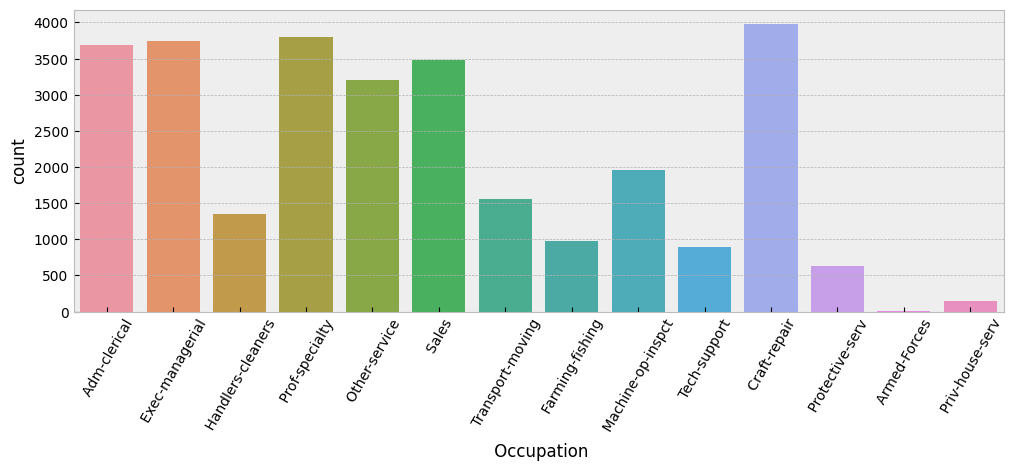

 Relationship


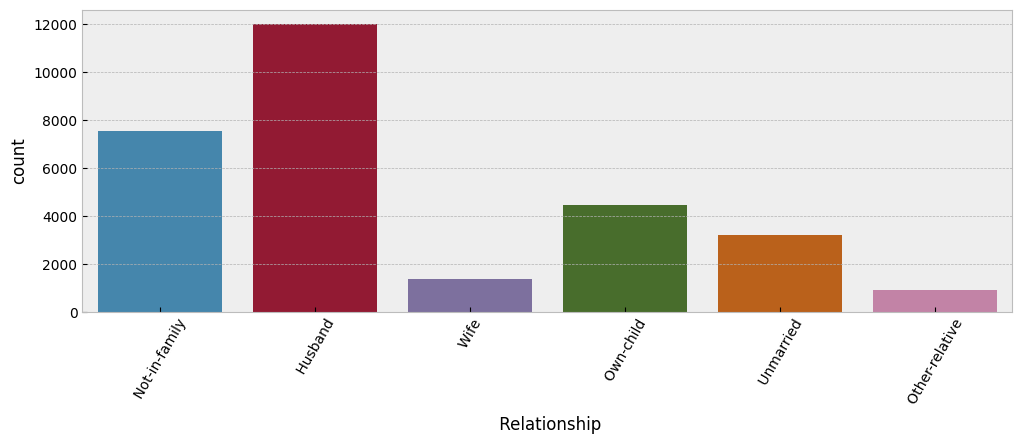

 Race


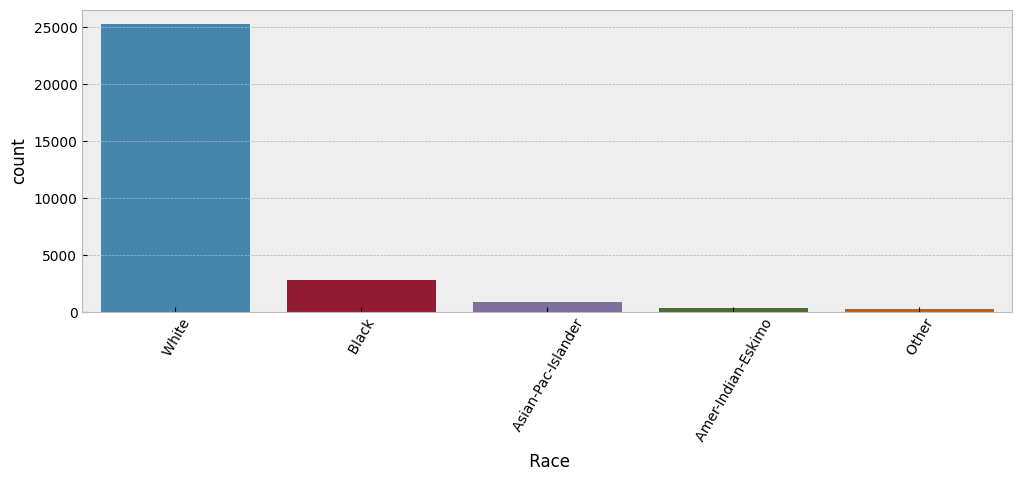

 Sex


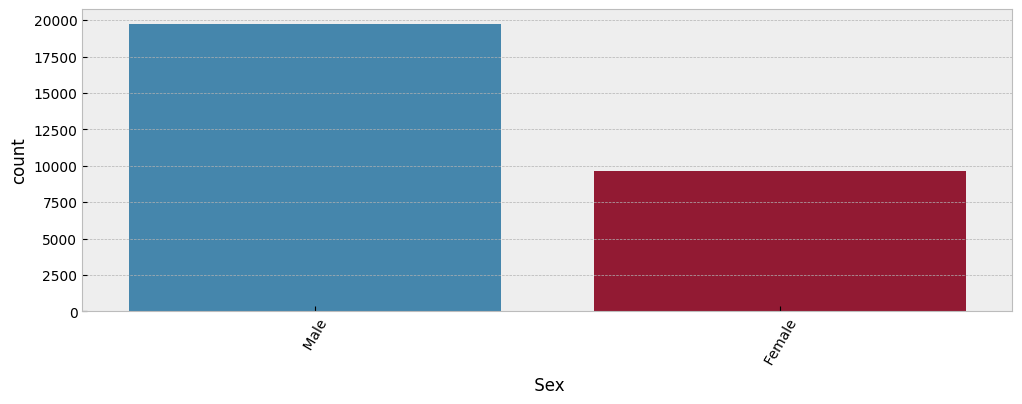

 Native-country


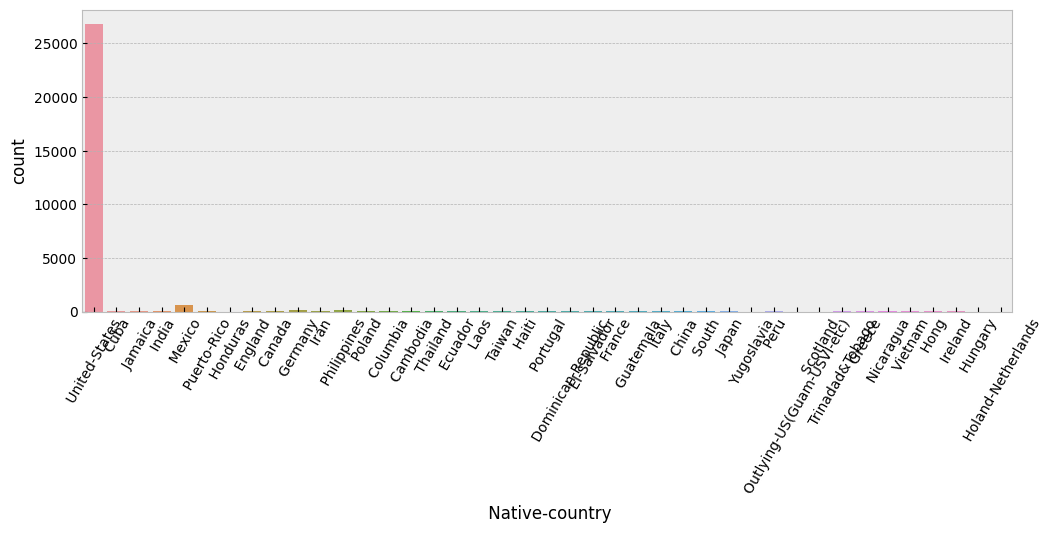

 Income


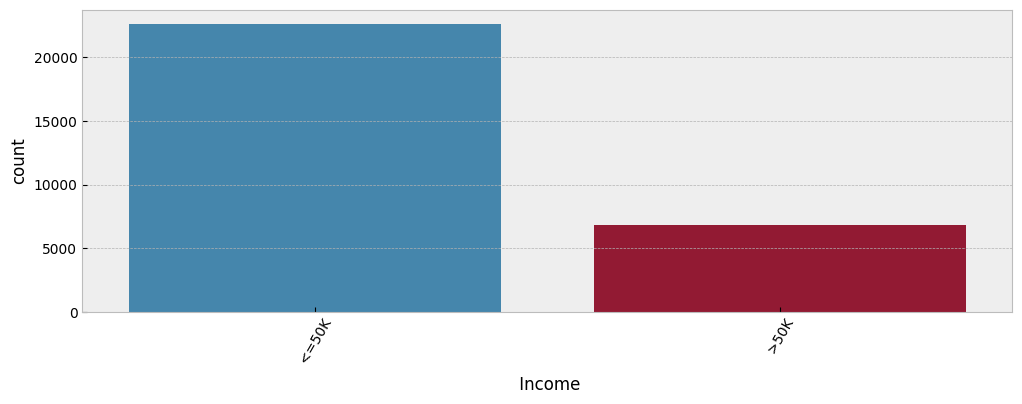

Capital_join


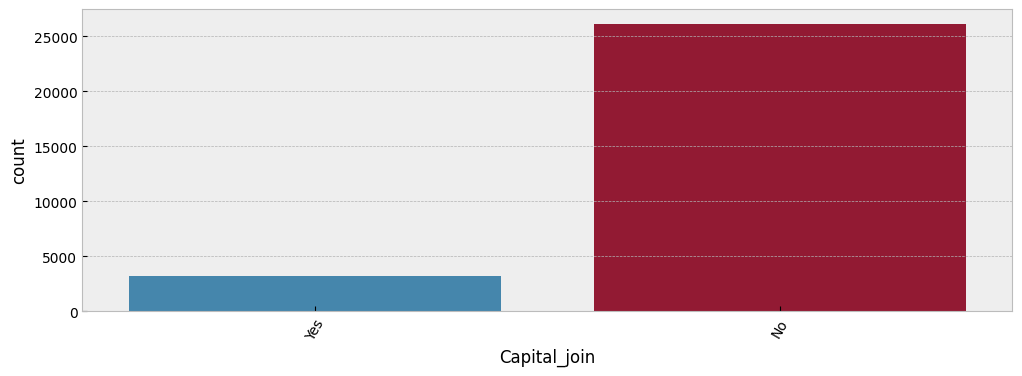

In [26]:
# Distribution of categorical variables
for i in df.select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(12,4),dpi=100)
    sns.countplot(df[i])
    plt.xticks(rotation=60)
    plt.show()

# 4 Correlations

## 4.1 Numerical with Income

In [27]:
columns_=['Age', ' fnlwgt', ' Hours-per-week', 'Capital','income']

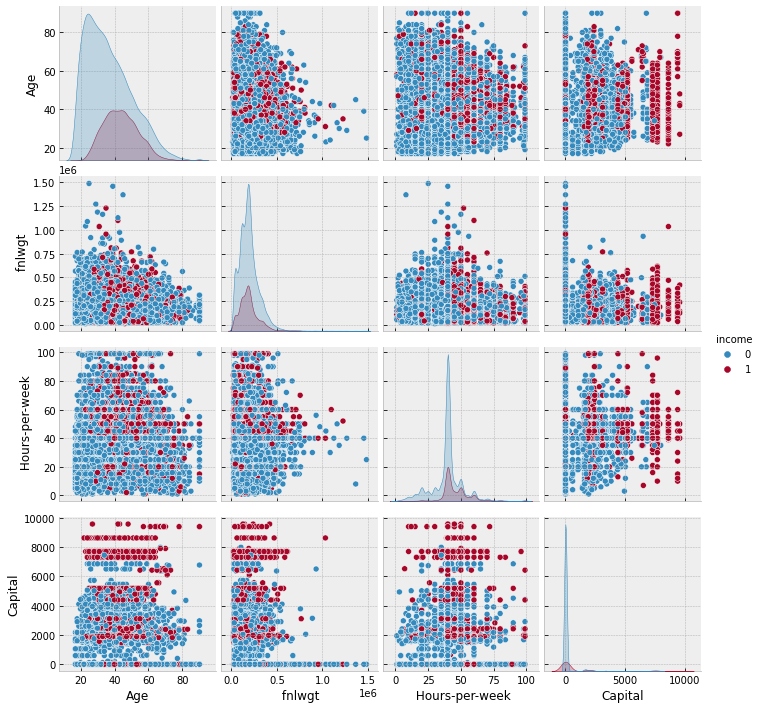

In [28]:
sns.pairplot(df[columns_],hue="income") # , markers=["o", "+"])

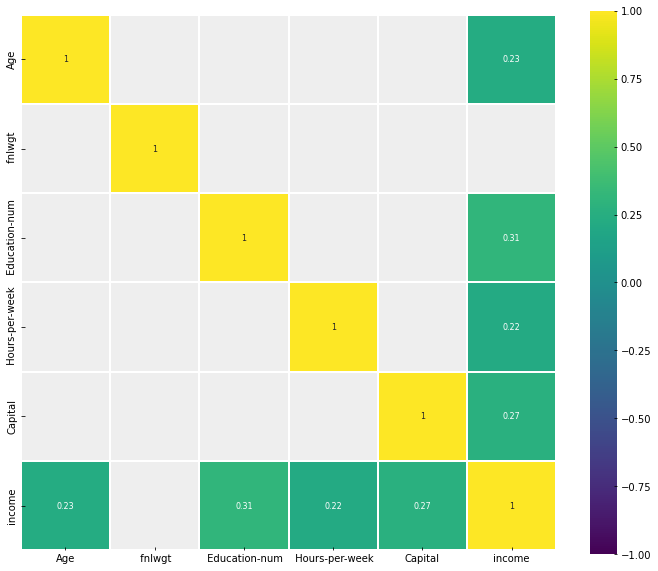

In [29]:
corr = df.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## 4.2 Categorical with Income

## 4.2.1 average income 

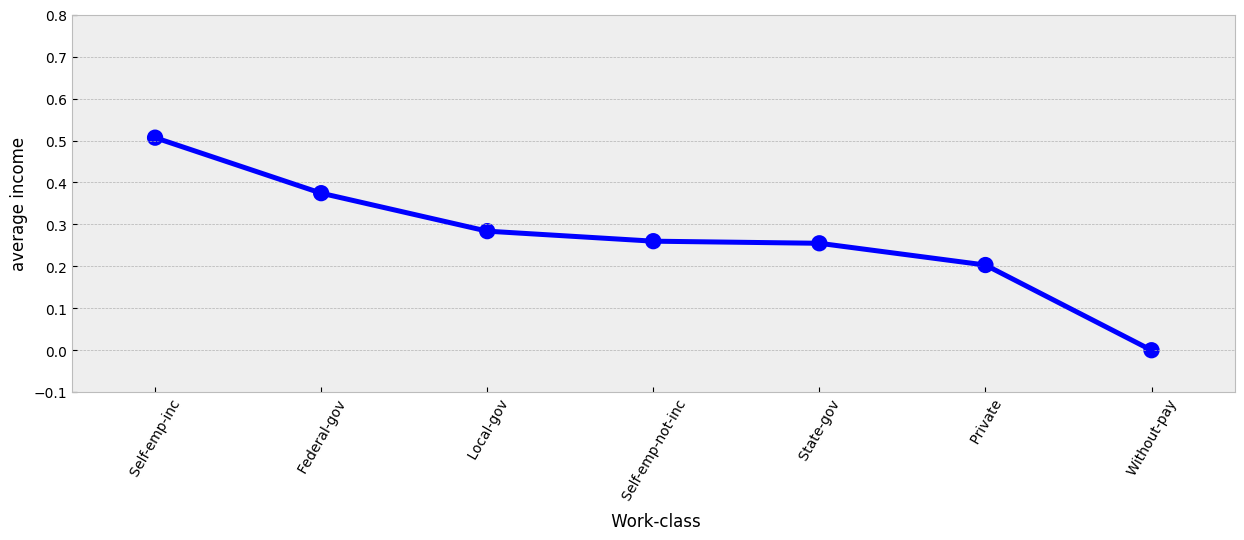

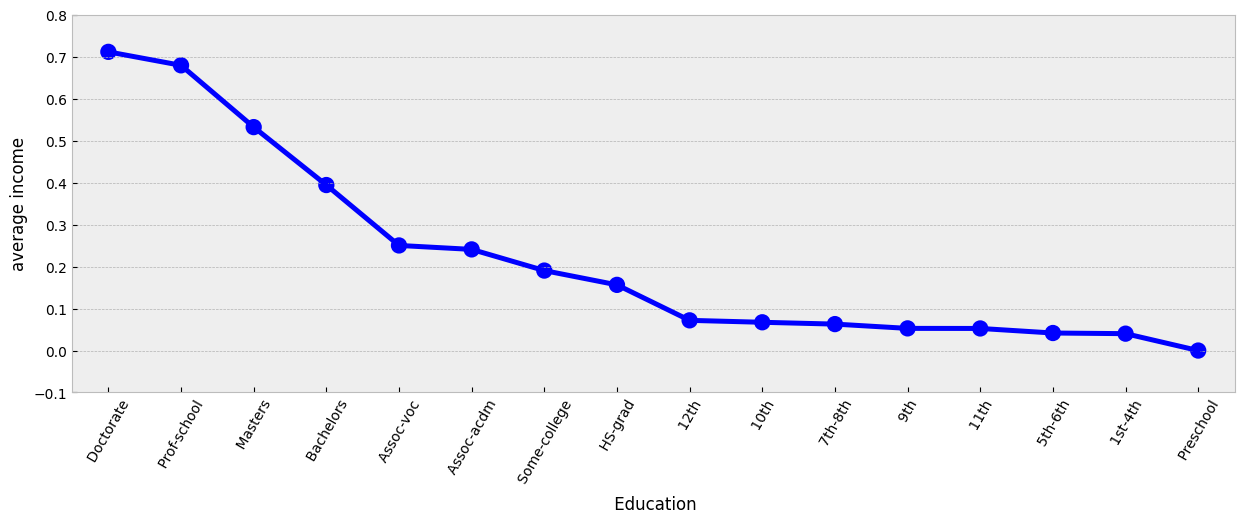

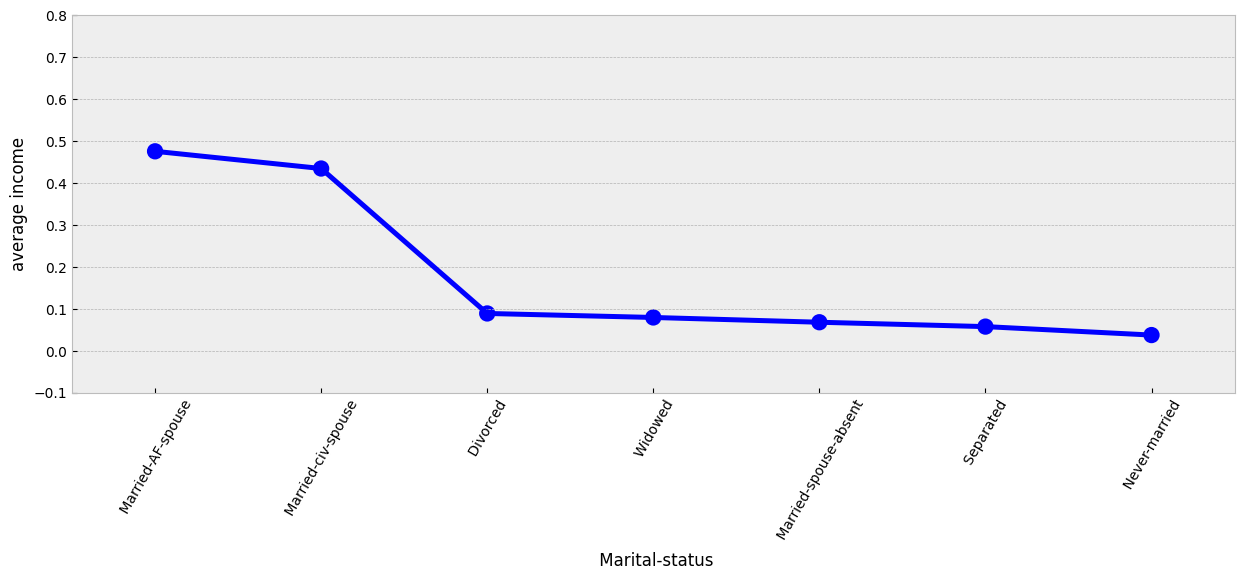

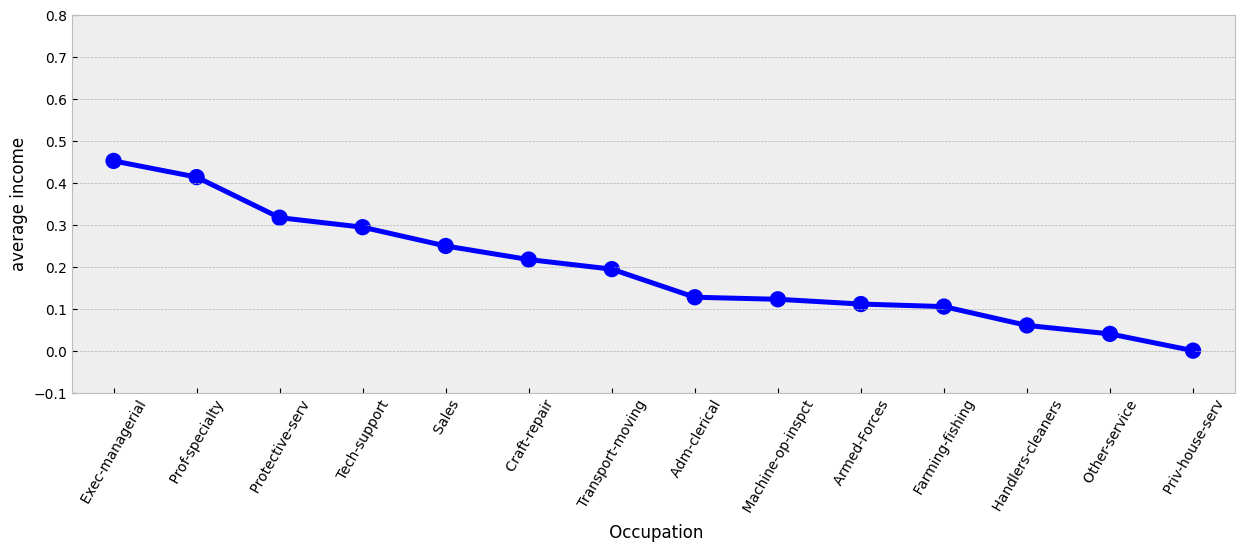

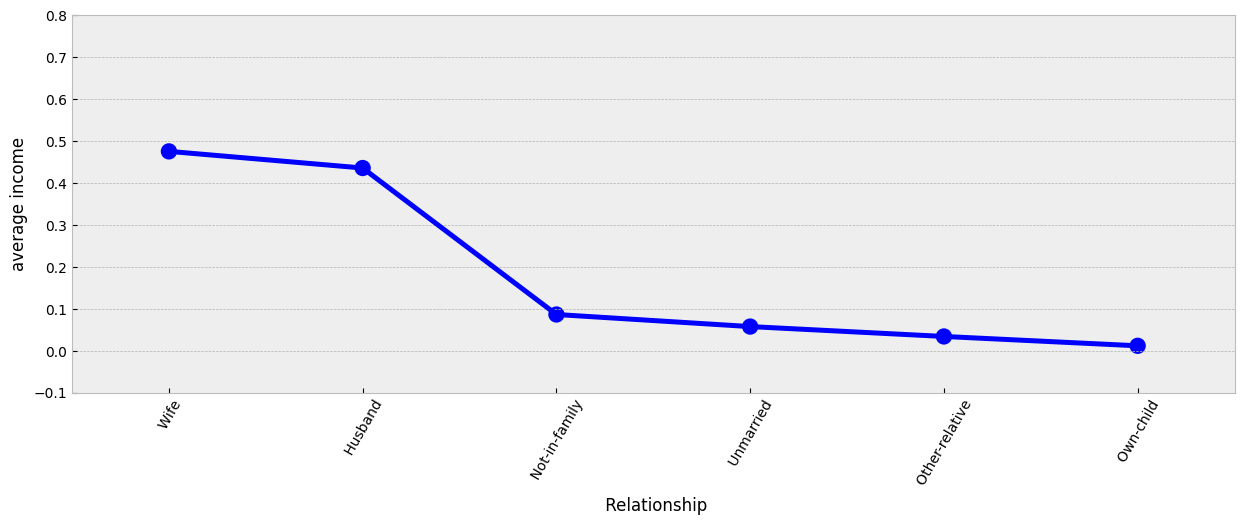

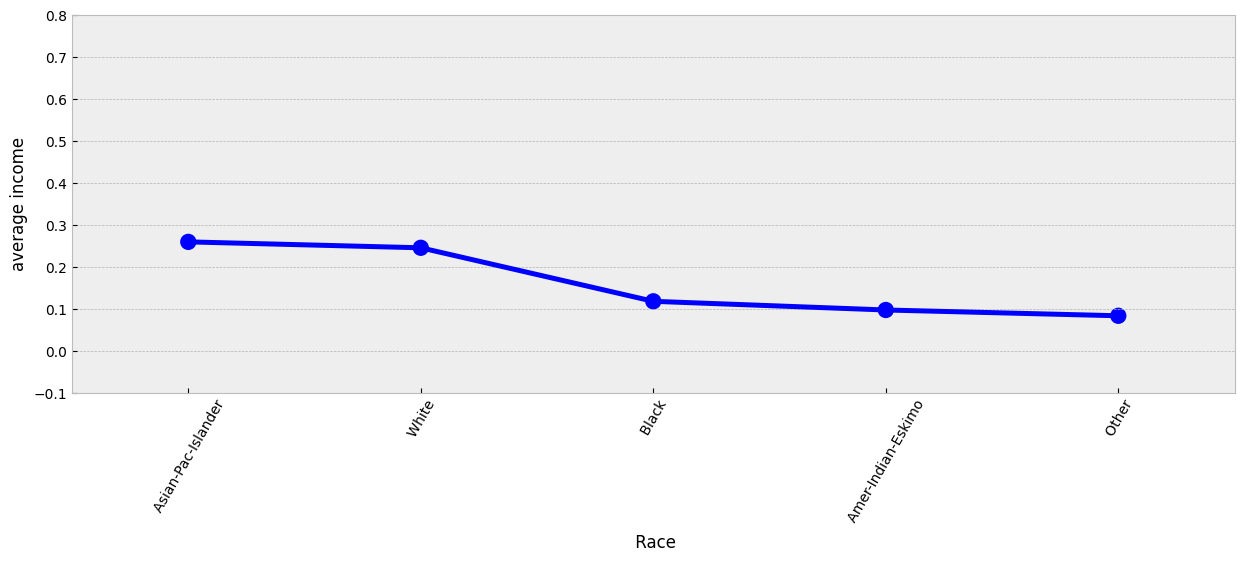

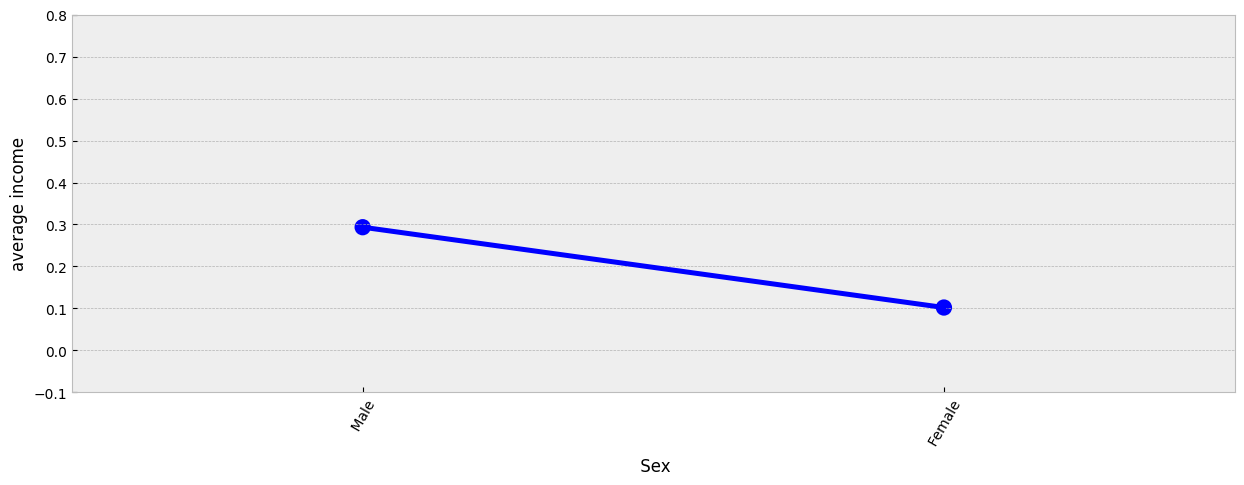

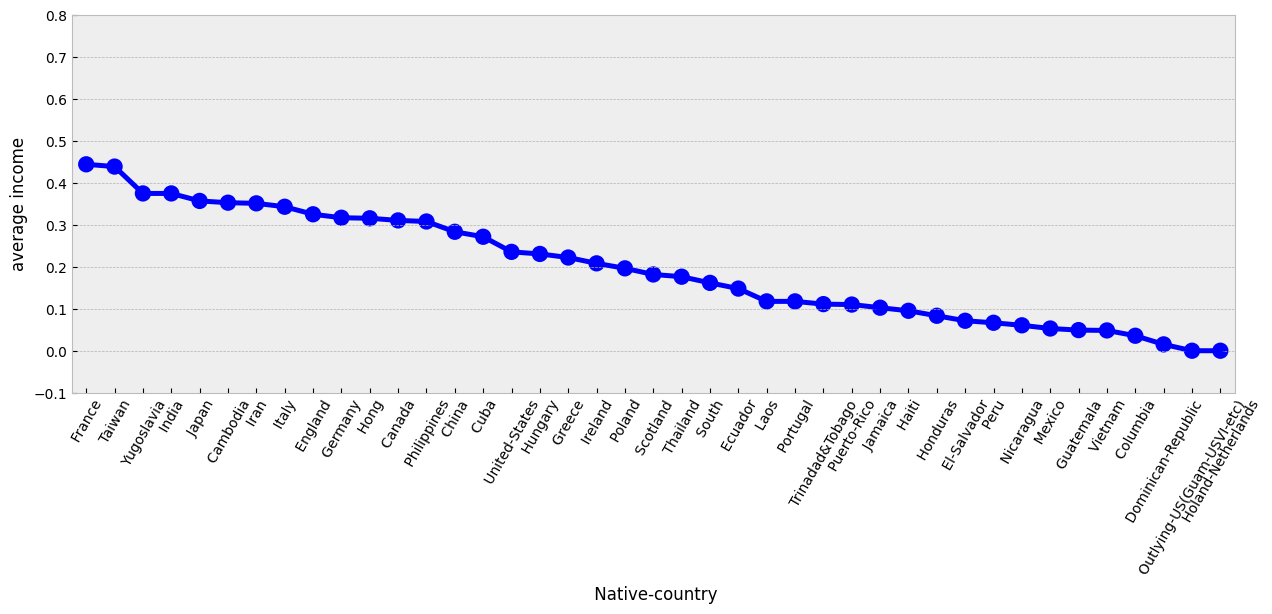

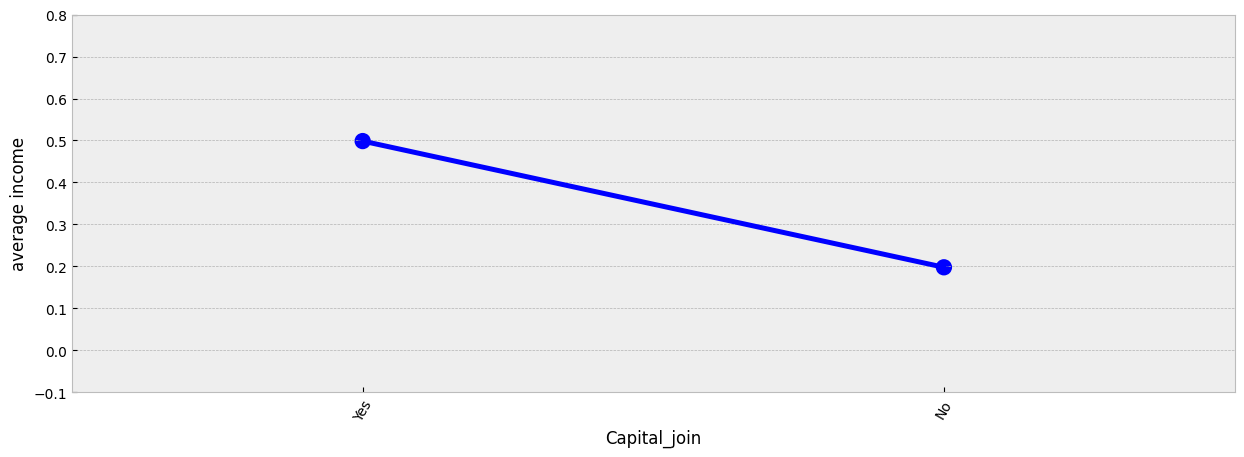

In [30]:
# check the difference of average income in one categorical data
df_ca = df.select_dtypes(include = ['object'])
df_ca=df_ca.merge(df['income'],left_index=True,right_index=True)
df_ca.drop(' Income',axis=1,inplace=True)
for i in df_ca.columns[:-1]:
    df_tem=df_ca[[i, 'income']].groupby([i], as_index=False).mean().sort_values(by='income', ascending=False)
    plt.figure(figsize=(15,5),dpi=100)
    x=df_tem.iloc[:,0]
    y=df_tem.iloc[:,1]
    ax=sns.pointplot(x=x,y=y,color='blue')
    ax.set_ylim(-0.1,0.8)
    plt.ylabel('average income')
    plt.xticks(rotation=60)
    plt.show()

### 4.2.2 count by income for every categorical columns

 Work-class


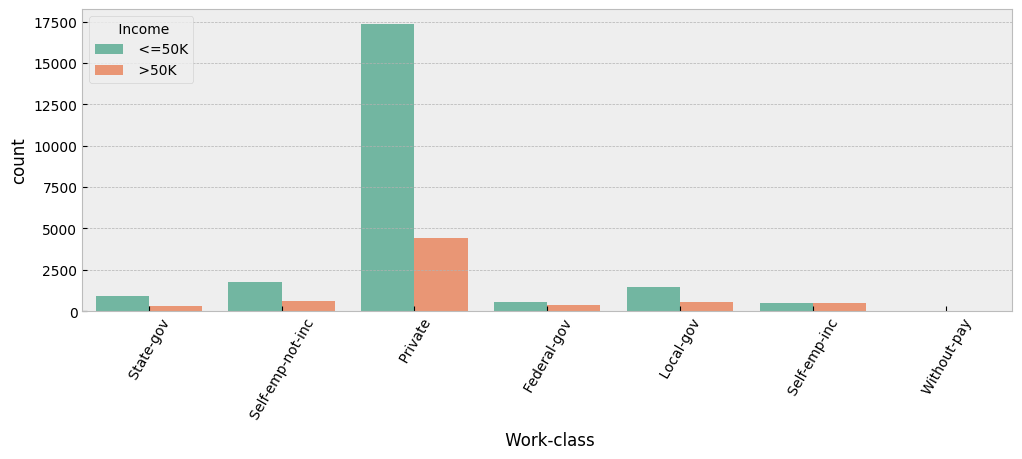

 Education


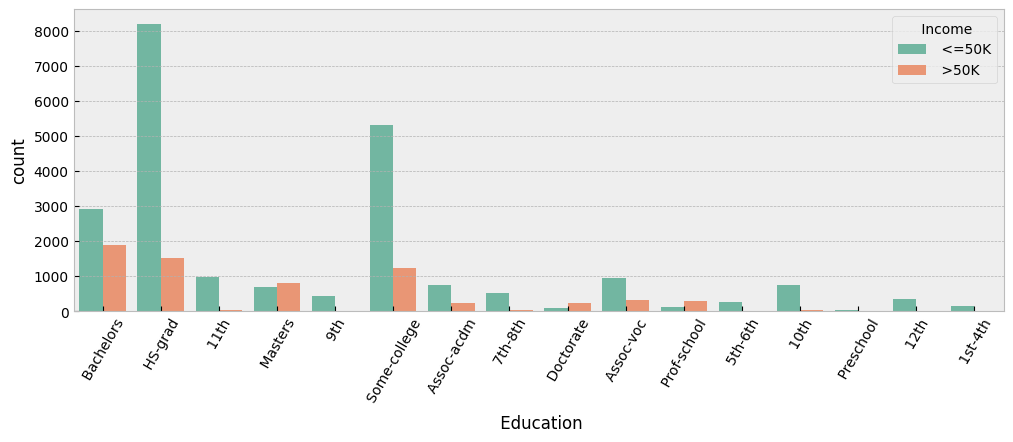

 Marital-status


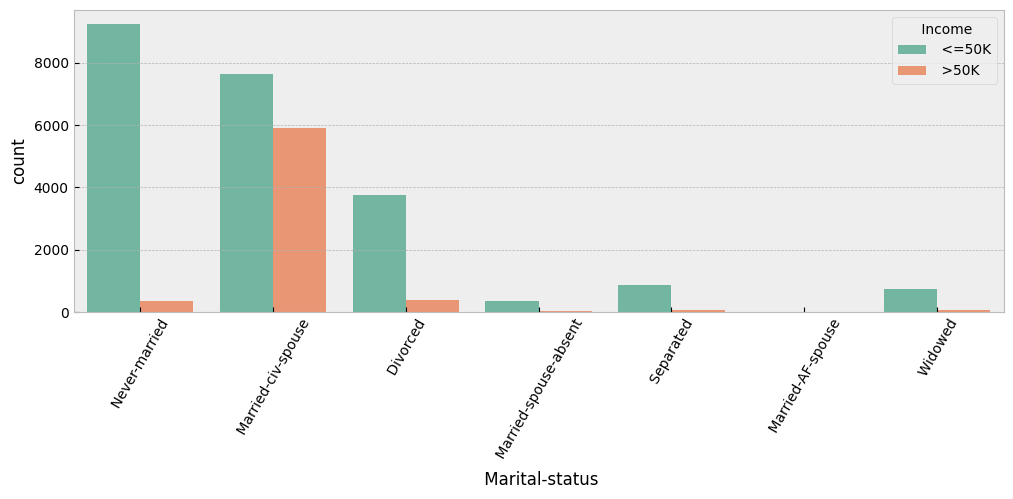

 Occupation


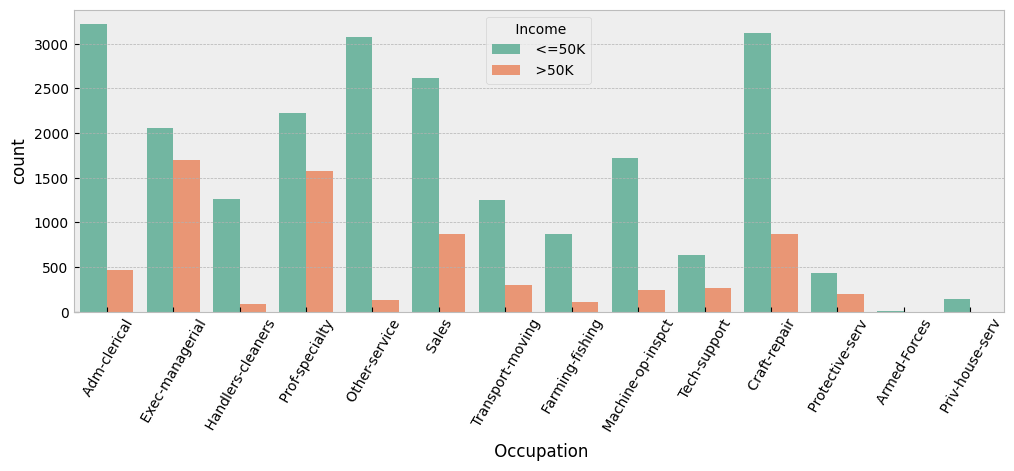

 Relationship


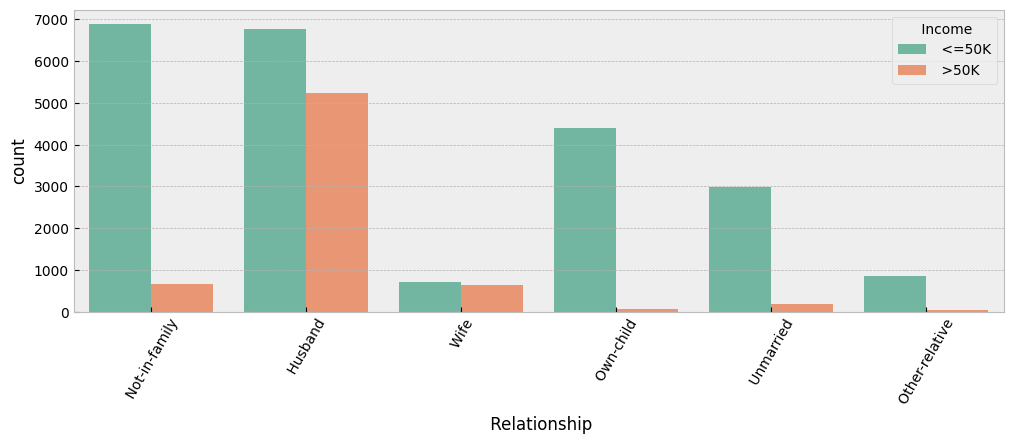

 Race


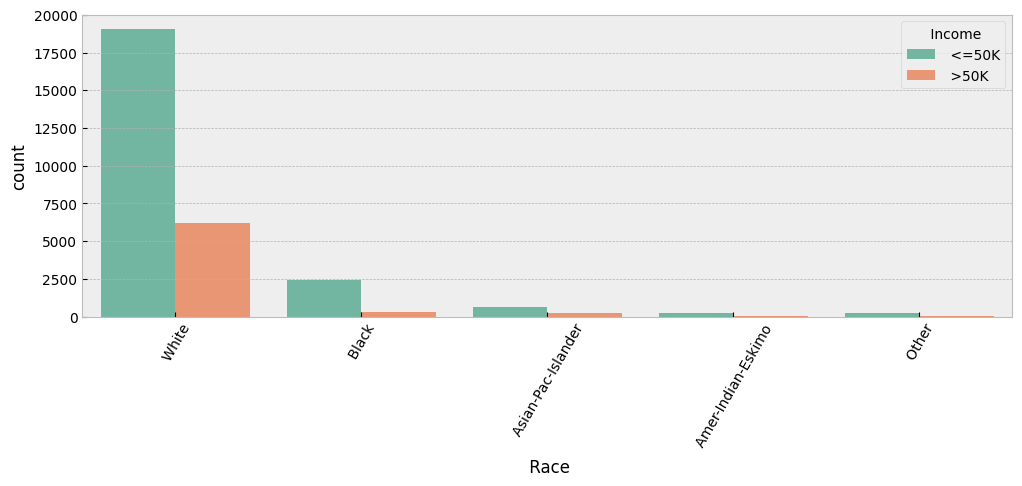

 Sex


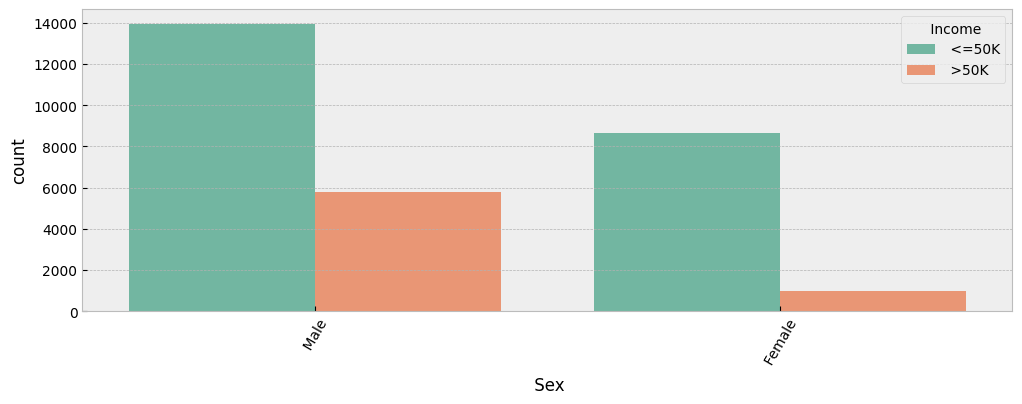

 Native-country


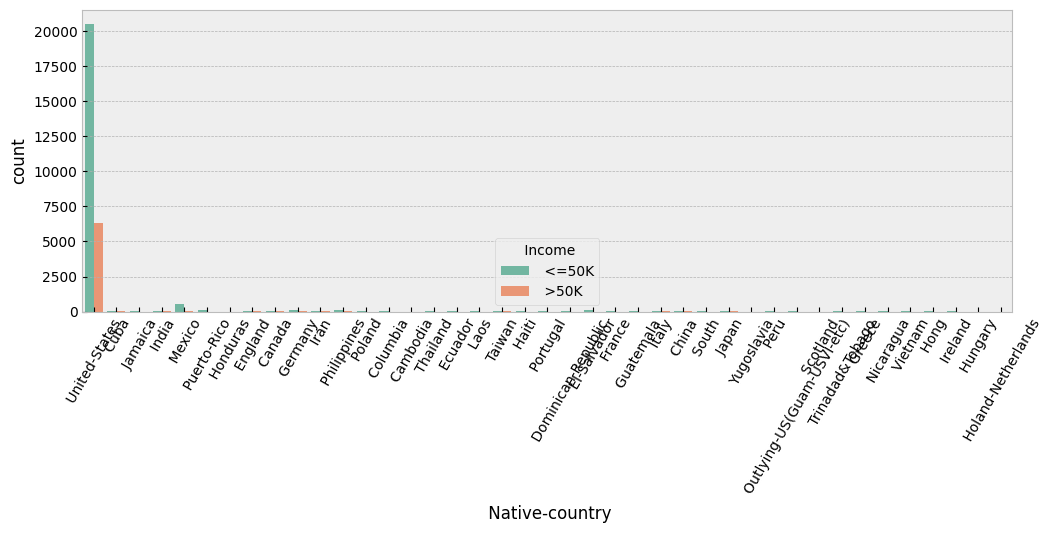

 Income


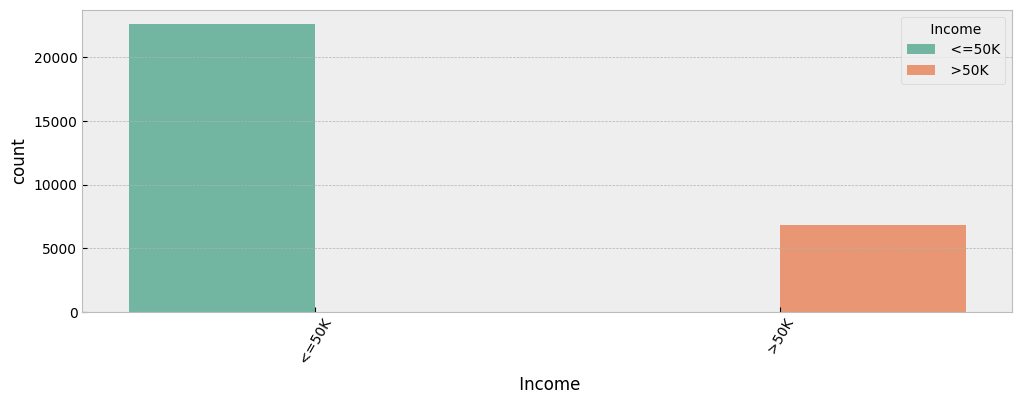

Capital_join


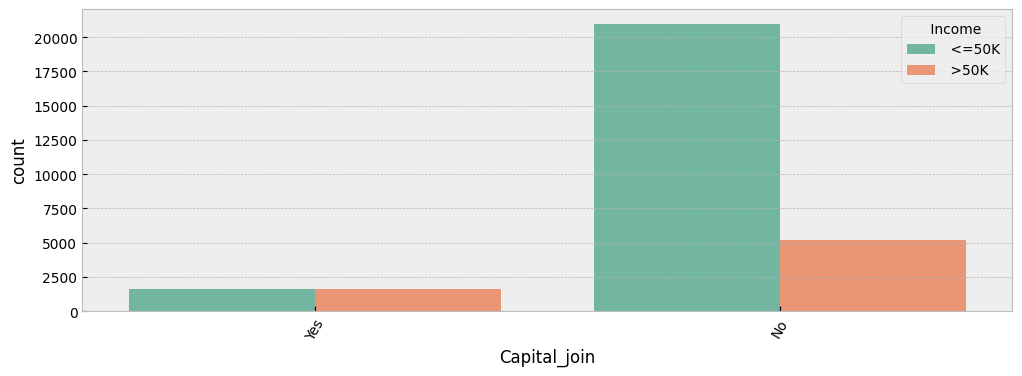

In [31]:
# Count the two types of income for different dimensions
for i in df.select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(12,4),dpi=100)
    sns.countplot(df[i],hue=df[' Income'],palette="Set2")
    plt.xticks(rotation=60)
    plt.show()

### 4.2.3 Count by income in Sex==Female
- interesting findings in the  Education,marital-status

 Work-class


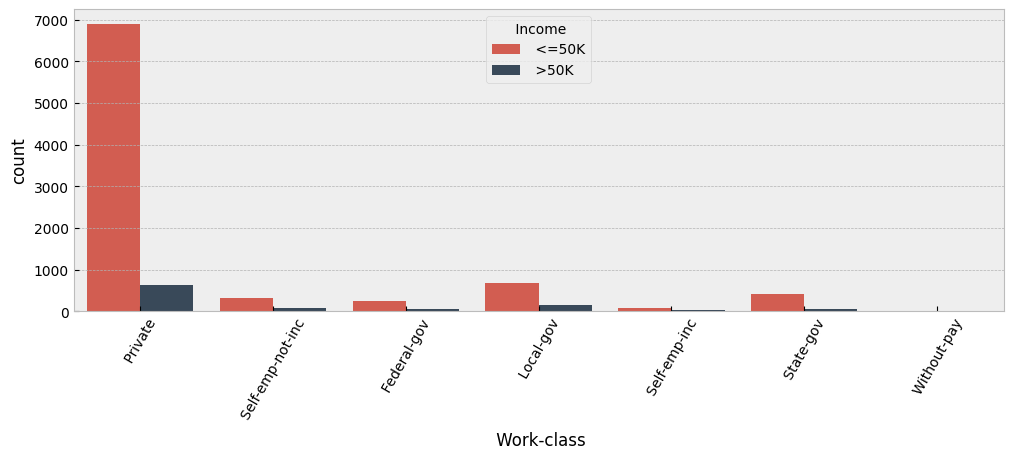

 Education


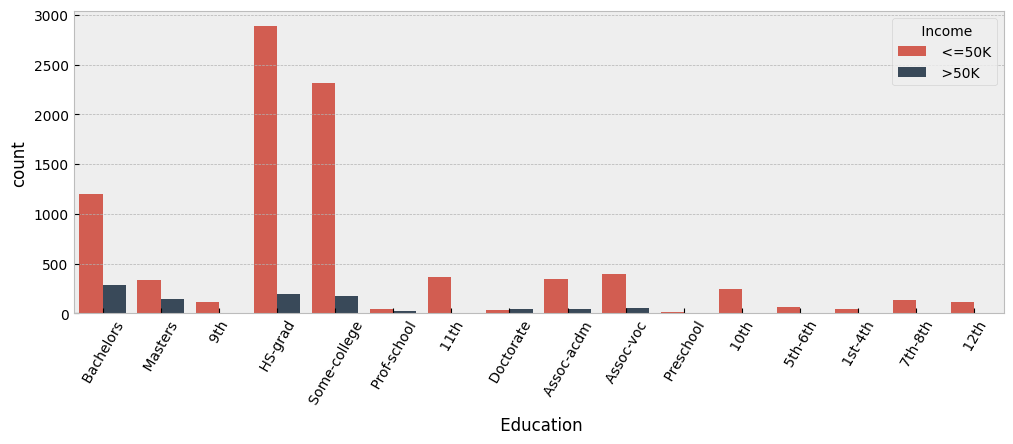

 Marital-status


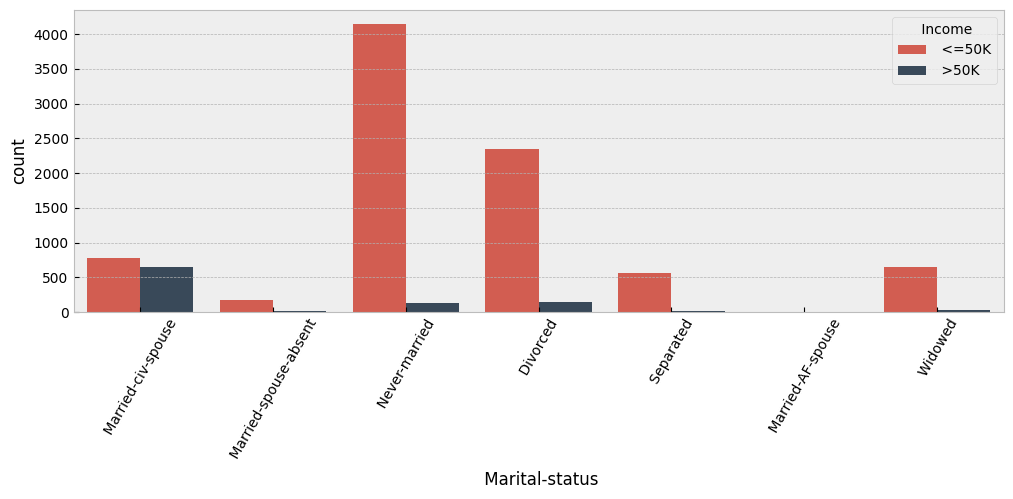

 Occupation


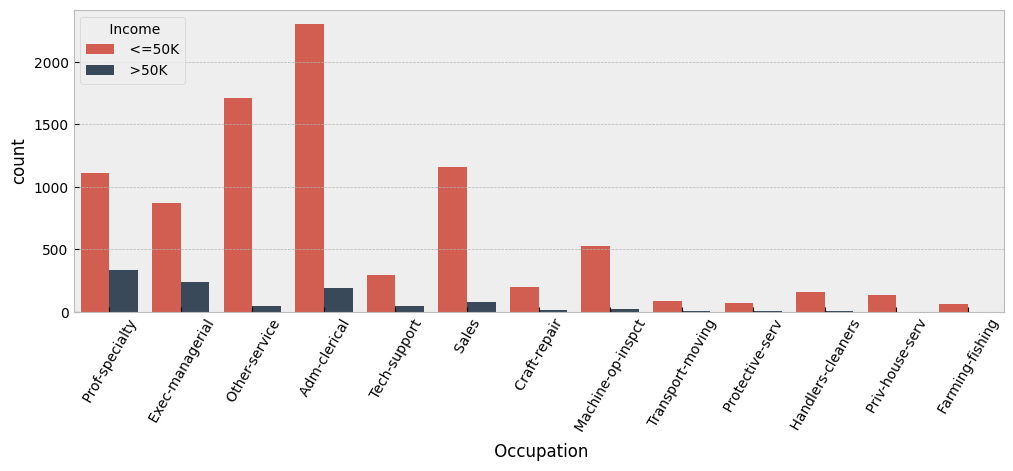

 Relationship


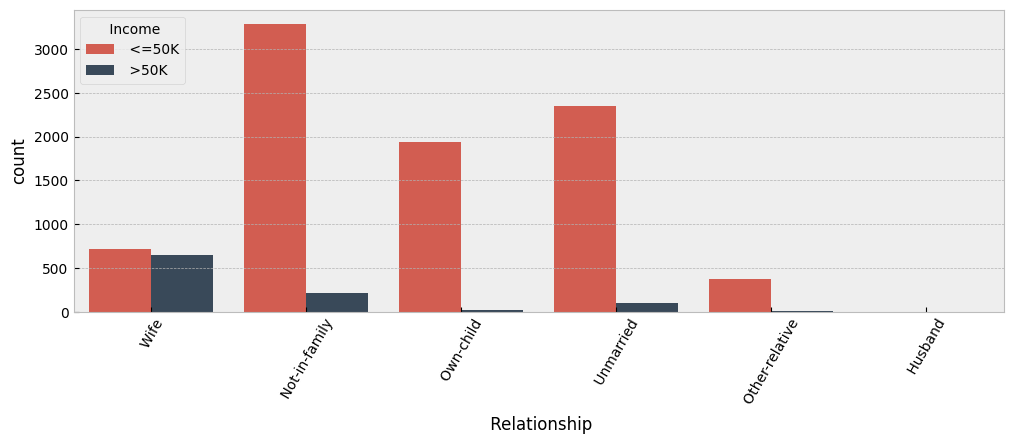

 Race


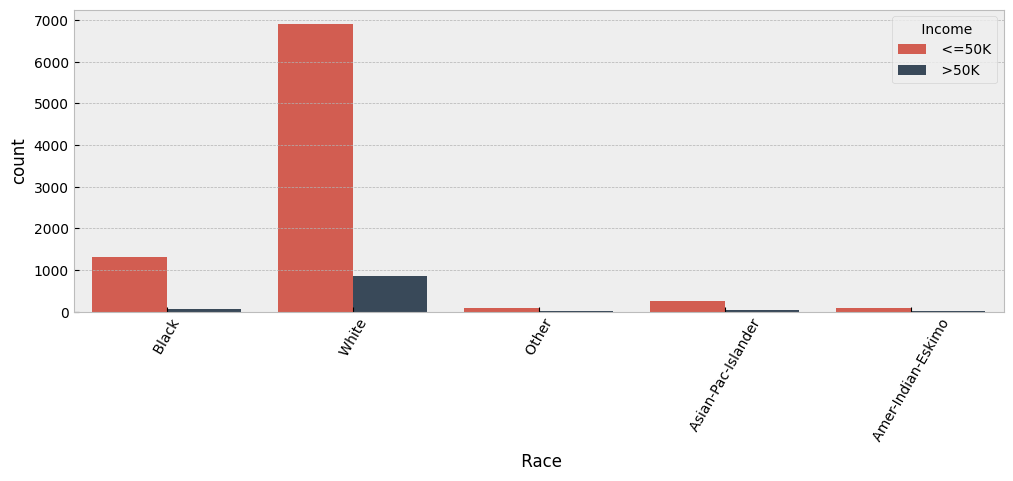

 Sex


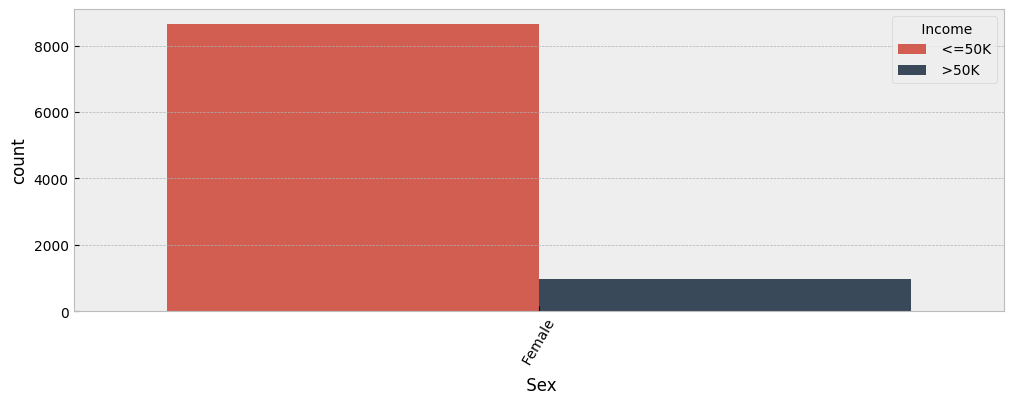

 Native-country


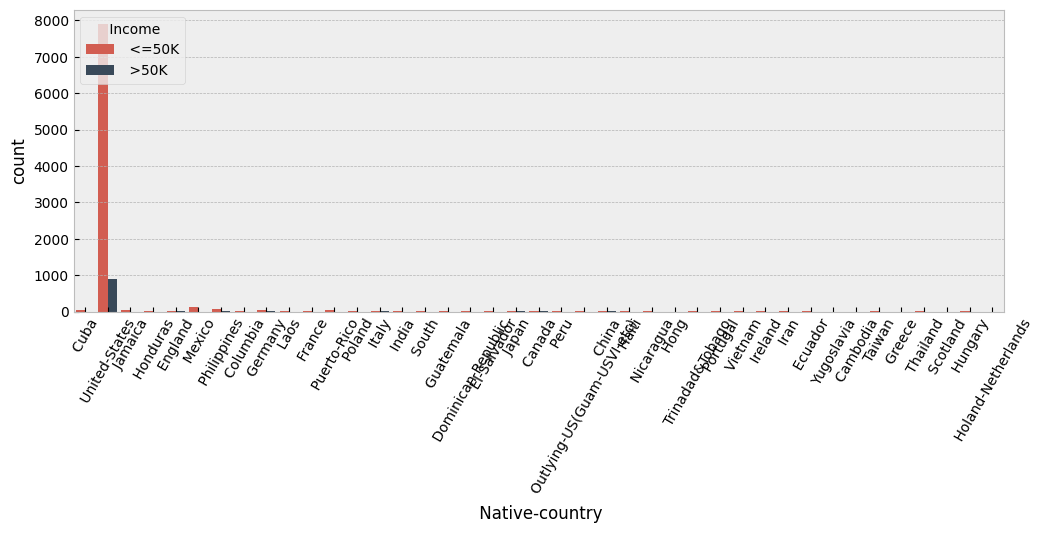

 Income


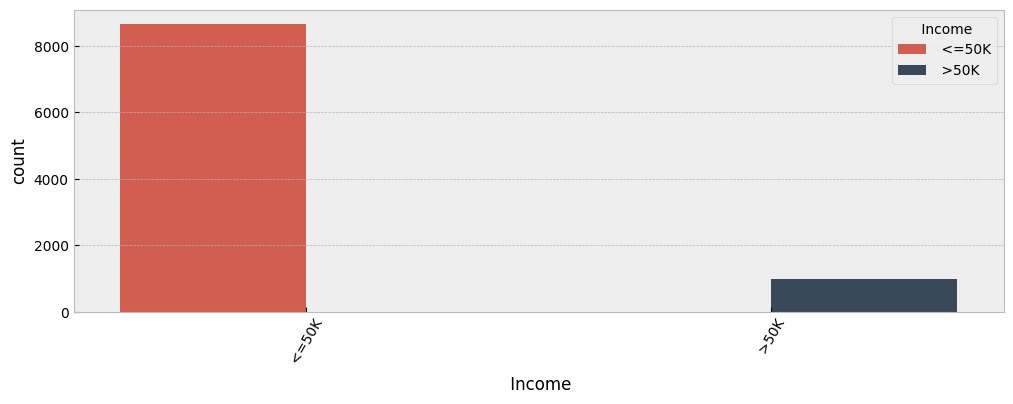

Capital_join


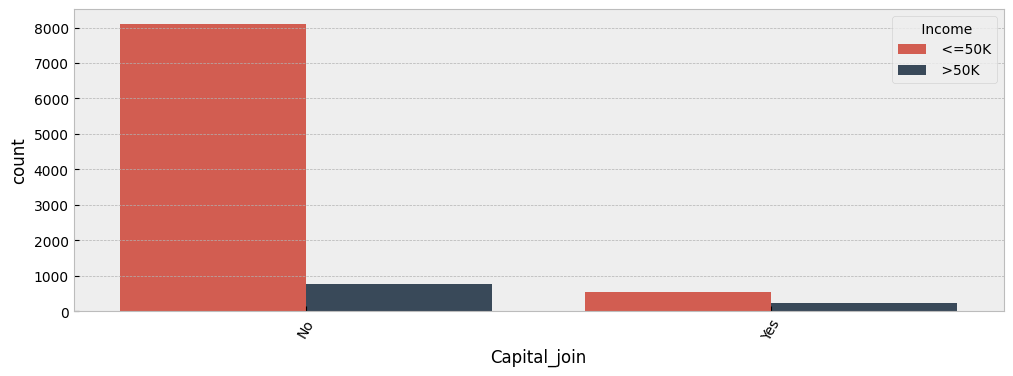

In [32]:
for i in df.select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(12,4),dpi=100)
    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.countplot(df[df[' Sex']==' Female'][i],hue=df[' Income'],palette=flatui[3:])
    plt.xticks(rotation=60)
    plt.show()

### 4.2.4 Count by income when sex==Male

 Work-class


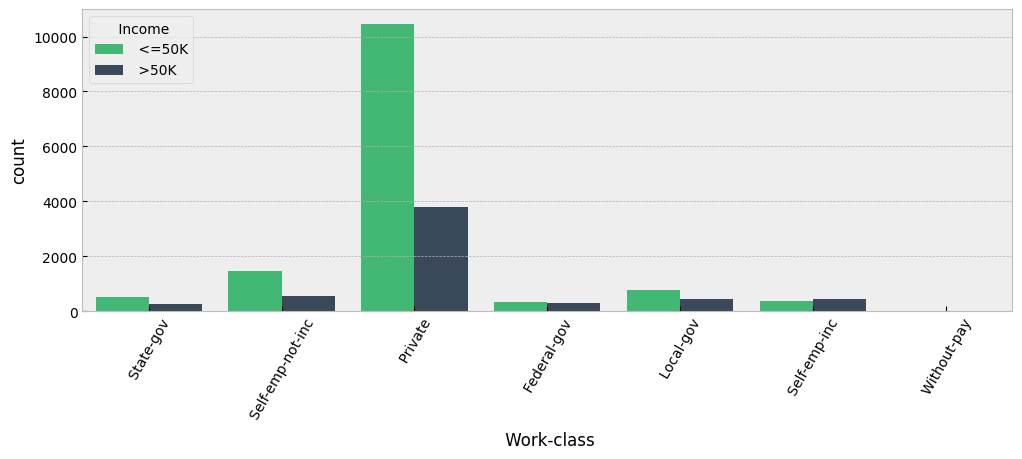

 Education


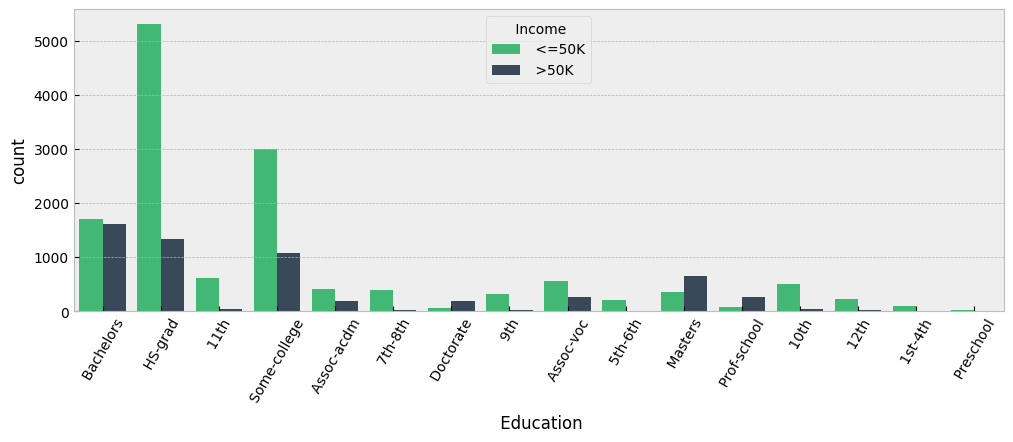

 Marital-status


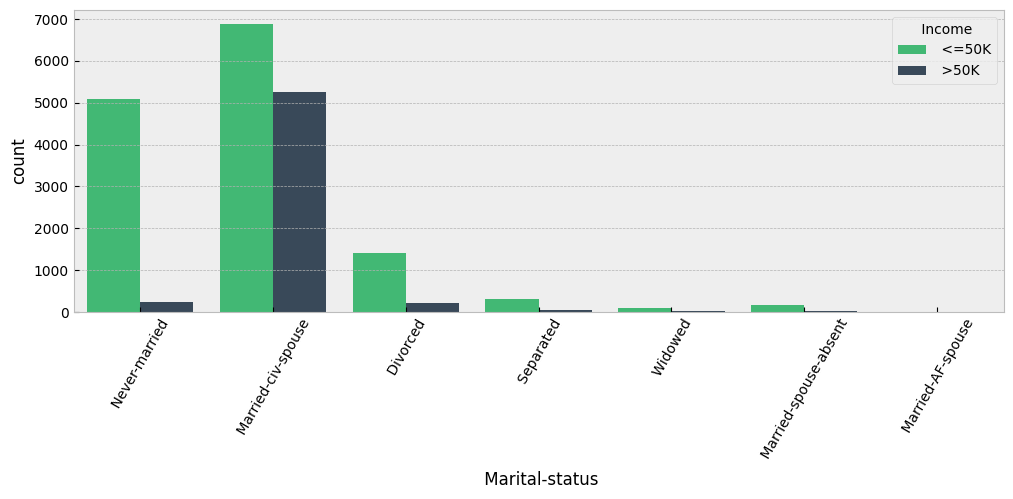

 Occupation


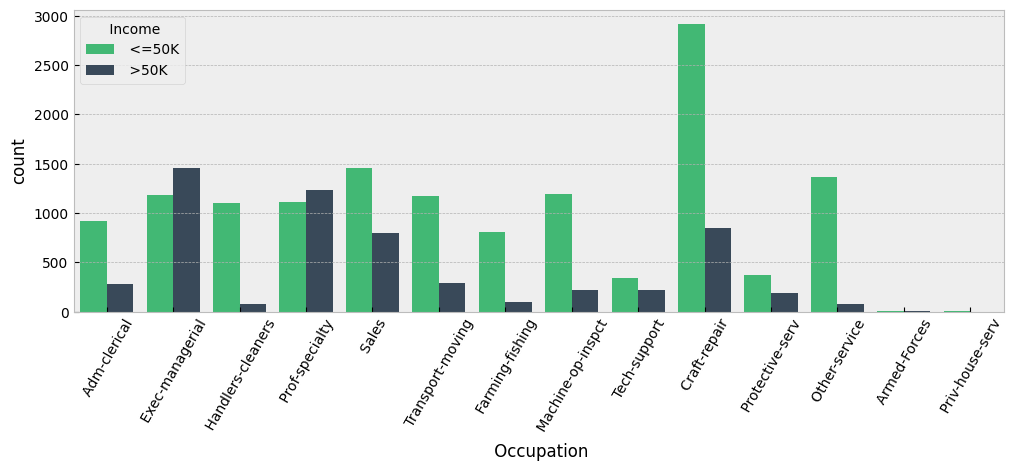

 Relationship


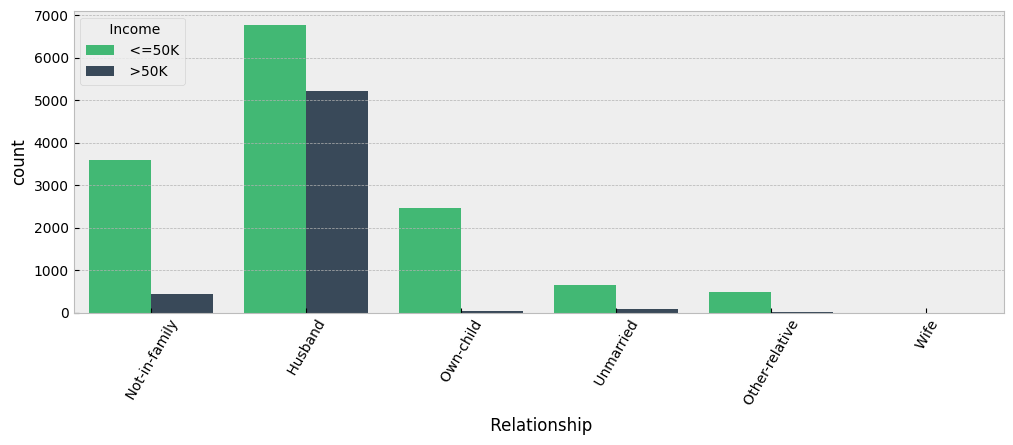

 Race


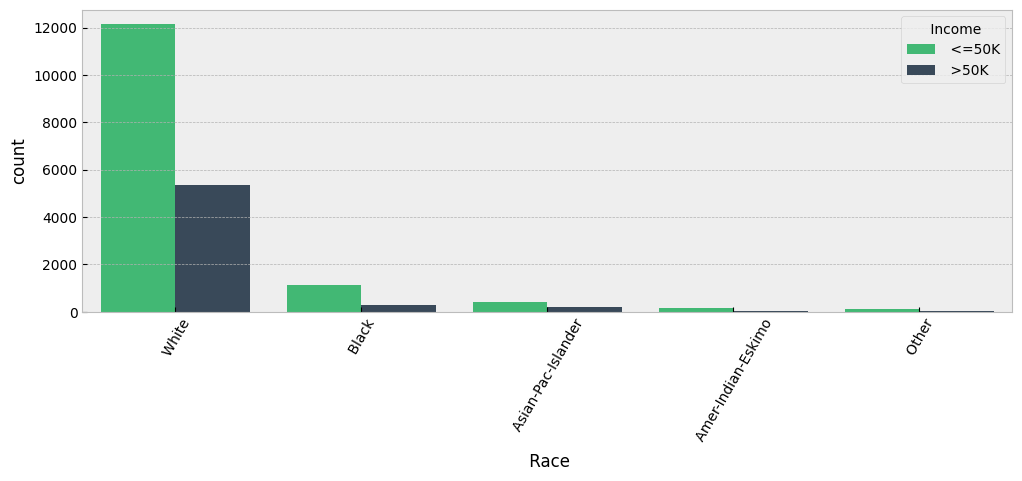

 Sex


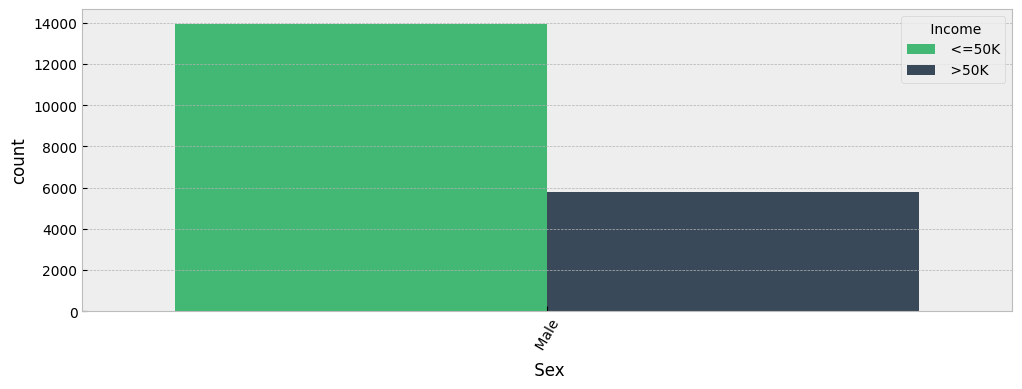

 Native-country


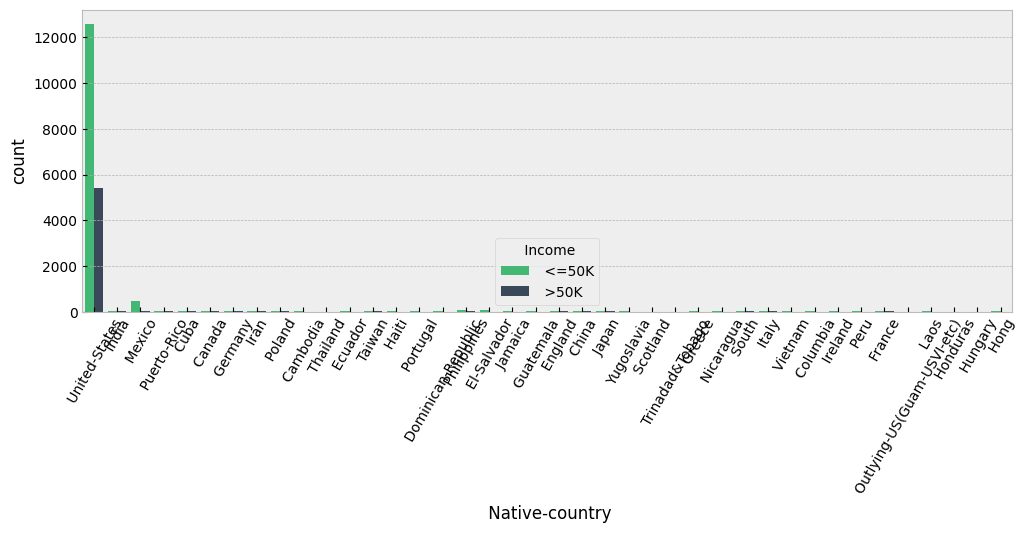

 Income


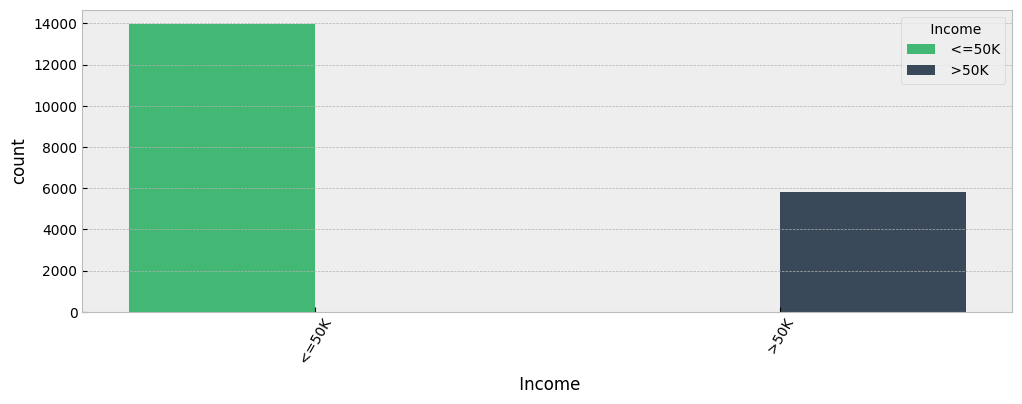

In [33]:
for i in df.iloc[:,:-2].select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(12,4),dpi=100)
    flatui = [  "#2ecc71","#34495e"]
    sns.countplot(df[df[' Sex']==' Male'][i],hue=df[' Income'],palette=flatui)
    plt.xticks(rotation=60)
    plt.show()